# Make a figure of the deformation

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# We need these two classes to set proper ticklabels for Cartopy maps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import pyproj
import verde as vd
from vectorspline3d import VectorSpline3D
from vectorspline3d.vector import greens_func_3d

In [36]:
region = (-50e3, 50e3, -50e3, 50e3)
spacing = 0.5e3
coords = vd.grid_coordinates(region, spacing=spacing)
eps = 1e3

force = np.array([
    [0, 0],
    [0, 0],
    [1/eps, -1/eps],
]).ravel()
force_coords = ([0, 0], [-0.5*eps, 0.5*eps])

force = np.array([
    [-1/eps, 1/eps],
    [0, 0],
    [0, 0],
]).ravel()
force_coords = ([-0.5*eps, 0.5*eps], [0, 0])

spline = VectorSpline3D(poisson=0.5, depth=3e3, force_coords=force_coords)
spline.force_ = force
pred = spline.predict(coords)
east, north, up = pred

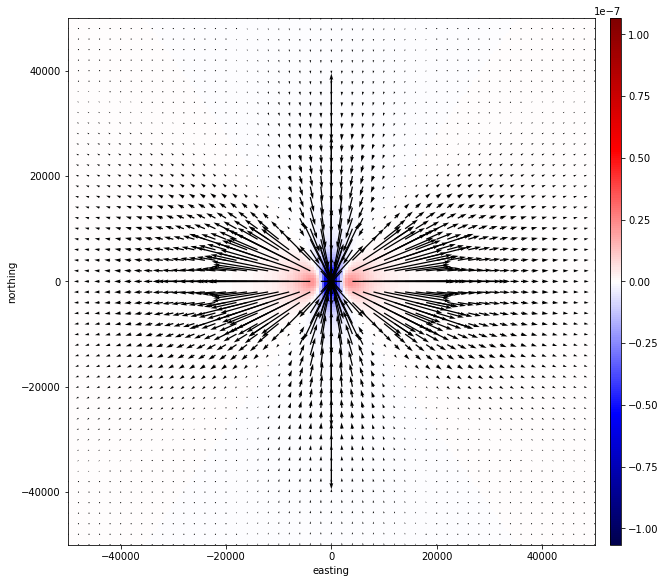

In [33]:
plt.figure(figsize=(10, 8.2))
maxabs = np.abs([up.min(), up.max()]).max()
plt.pcolormesh(coords[0] - spacing/2, coords[1] - spacing/2, up,
              vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(pad=0.01, aspect=50)
s = 4
plt.quiver(coords[0][::s,::s], coords[1][::s,::s], 
           east[::s,::s], north[::s,::s], 
           scale=1e-7)
plt.axis('scaled')
plt.xlabel('easting')
plt.ylabel('northing')
plt.xlim(region[:2])
plt.ylim(region[2:])
plt.tight_layout()

In [37]:
jac = spline.jacobian(coords, force_coords)
pred_jac = [i.reshape(coords[0].shape)
            for i in jac.dot(force).reshape((3, jac.shape[0]//3))]
print(np.allclose(pred, pred_jac))

True
